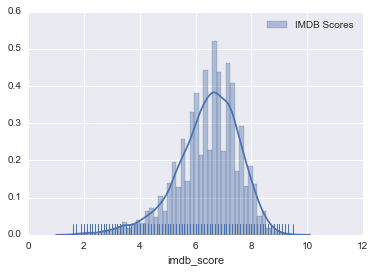

In [5]:
import scipy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer,StandardScaler
import warnings
%matplotlib inline
movie = pd.read_csv('movie_metadata_new.csv')
numerical_data = movie.select_dtypes(exclude=["object"])

# take out the y value(imdb_score from data)
score_imdb= numerical_data["imdb_score"]
numerical_data = numerical_data.drop(["imdb_score"],axis=1)
year_category = numerical_data["title_year"]
numerical_data = numerical_data.drop(["title_year"],axis=1)
numerical_columns = numerical_data.columns
# print (numerical_columns.shape)
#Plot distribution of actual imdb scores
sns.distplot(score_imdb,rug=True,label="IMDB Scores").legend()

In [6]:
#fill missing values and normalize the data
imp = Imputer(missing_values="NaN",strategy="mean",axis=0)      #default values
numerical_data[numerical_columns] = imp.fit_transform(numerical_data[numerical_columns])
print (numerical_data.describe())

       num_critic_for_reviews     duration  director_facebook_likes  \
count             5043.000000  5043.000000              5043.000000   
mean               140.194272   107.201074              1105.454220   
std                120.997229    25.159932              3037.520507   
min                  1.000000     7.000000                 0.000000   
25%                 50.000000    93.000000                22.000000   
50%                111.000000   103.000000               100.000000   
75%                194.000000   118.000000               490.000000   
max                813.000000   511.000000             27000.000000   

       actor_3_facebook_likes  actor_1_facebook_likes         gross  \
count             5043.000000             5043.000000  5.043000e+03   
mean              1851.247610             4778.852036  4.846841e+07   
std               3635.380456             6941.544320  6.216318e+07   
min                  0.000000                1.000000  1.620000e+02   
25%  

In [7]:
scaler = StandardScaler()
numerical_data[numerical_columns] = scaler.fit_transform(numerical_data[numerical_columns])
print (numerical_data.describe())
print (numerical_data.shape)

       num_critic_for_reviews      duration  director_facebook_likes  \
count            5.043000e+03  5.043000e+03             5.043000e+03   
mean            -2.223528e-16 -8.788440e-17             2.825532e-16   
std              1.000099e+00  1.000099e+00             1.000099e+00   
min             -1.150506e+00 -3.982960e+00            -3.639692e-01   
25%             -7.454982e-01 -5.644881e-01            -3.567257e-01   
50%             -2.413044e-01 -1.669913e-01            -3.310443e-01   
75%              4.447297e-01  4.292538e-01            -2.026374e-01   
max              5.561057e+00  1.605088e+01             8.525741e+00   

       actor_3_facebook_likes  actor_1_facebook_likes         gross  \
count            5.043000e+03            5.043000e+03  5.043000e+03   
mean             3.331990e-16            3.822817e-16 -2.135908e-16   
std              1.000099e+00            1.000099e+00  1.000099e+00   
min             -5.092813e-01           -6.883664e-01 -7.797711e-01

In [8]:
print (numerical_data.shape)

(5043, 14)


In [9]:
numerical_data = pd.DataFrame(numerical_data)
print (numerical_data.describe())

       num_critic_for_reviews      duration  director_facebook_likes  \
count            5.043000e+03  5.043000e+03             5.043000e+03   
mean            -2.223528e-16 -8.788440e-17             2.825532e-16   
std              1.000099e+00  1.000099e+00             1.000099e+00   
min             -1.150506e+00 -3.982960e+00            -3.639692e-01   
25%             -7.454982e-01 -5.644881e-01            -3.567257e-01   
50%             -2.413044e-01 -1.669913e-01            -3.310443e-01   
75%              4.447297e-01  4.292538e-01            -2.026374e-01   
max              5.561057e+00  1.605088e+01             8.525741e+00   

       actor_3_facebook_likes  actor_1_facebook_likes         gross  \
count            5.043000e+03            5.043000e+03  5.043000e+03   
mean             3.331990e-16            3.822817e-16 -2.135908e-16   
std              1.000099e+00            1.000099e+00  1.000099e+00   
min             -5.092813e-01           -6.883664e-01 -7.797711e-01

In [10]:
#get non_numeric informational content
information_data = movie.select_dtypes(include=["object"])
print (information_data.columns)

Index([u'color', u'director_name', u'actor_2_name', u'genres', u'actor_1_name',
       u'movie_title', u'actor_3_name', u'plot_keywords', u'movie_imdb_link',
       u'language', u'country', u'content_rating'],
      dtype='object')


In [11]:
low_covariance_1 = []
low_covariance_2 = []
low_covariance_15 = []
low_covariance_2g = []
for x in numerical_columns:
    z = (np.corrcoef(numerical_data[x],y=score_imdb))
    if(np.fabs(z[0,1]) < 0.1):
        low_covariance_1.append(x)
    elif(np.fabs(z[0,1]) < 0.15):
        low_covariance_15.append(x)
    elif(np.fabs(z[0,1])<0.2):
        low_covariance_2.append(x)
    else:
        low_covariance_2g.append(x)

print (low_covariance_2g, "\n", low_covariance_2, "\n", low_covariance_15, "\n", low_covariance_1)

(['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'num_voted_users', 'num_user_for_reviews', 'movie_facebook_likes'], '\n', ['gross'], '\n', ['actor_1_facebook_likes'], '\n', ['actor_3_facebook_likes', 'cast_total_facebook_likes', 'facenumber_in_poster', 'budget', 'actor_2_facebook_likes', 'aspect_ratio'])


In [12]:
from sklearn.feature_selection import SelectKBest,SelectPercentile,RFE,RFECV,SelectFromModel
from sklearn.svm import SVR,SVC
from sklearn.linear_model import Lasso
#data which has high correlation with imdb_score is selected
select_k = SelectKBest(k=8)
x_transformed = select_k.fit_transform(numerical_data,y=score_imdb) #x_transformed is numpy array not pandas
#sklearn returns numpy array not pandas object
print (x_transformed.shape)

(5043, 8)


In [13]:
print (numerical_data.head(3))

   num_critic_for_reviews  duration  director_facebook_likes  \
0                4.817164  2.814234                 1.907846   
1                1.337401  2.456487                -0.177944   
2                3.817042  1.621744                 0.360378   

   actor_3_facebook_likes  actor_1_facebook_likes      gross  num_voted_users  \
0                0.563615                0.075084  11.455463         5.795674   
1                0.866227                5.074467   4.198009         2.798784   
2               -0.041608                0.507307   2.439077         1.388010   

   cast_total_facebook_likes  facenumber_in_poster  num_user_for_reviews  \
0                   0.833238             -0.681911              7.374185   
1                   2.517624             -0.681911              2.559220   
2                   1.258645             -0.184592              1.912276   

     budget  actor_2_facebook_likes  aspect_ratio  movie_facebook_likes  
0  1.007490                0.930643    

In [14]:
from sklearn.svm import LinearSVR
print("before model selection")

before model selection


In [15]:
#The underlying estimator SVR has no `coef_` or `feature_importances_` attribute.
#  Either pass a fitted estimator to SelectFromModel or call fit before calling transform.
estimator = LinearSVR().fit(numerical_data,score_imdb)
select_model = SelectFromModel(estimator,prefit=True)
#Uncomment this if you want to use selectFromModel with LinearSVR as feature selection algorithm
x_transformed = select_model.transform(numerical_data)
print (x_transformed.shape)

(5043, 5)


In [16]:
print("after model selection")

after model selection


In [17]:
#RFE use recursive selecting of attributes which is a time counsuming process.
estimator = LinearSVR()
selector = RFE(estimator)
selector = selector.fit(numerical_data,score_imdb)
print (selector.support_)
print (selector.ranking_)
#Comment/Uncomment this if you want to use/not use RFE as feature selection algorithm
x_transformed = selector.transform(numerical_data)
print (x_transformed.shape)

[False  True False False False  True  True  True False  True  True False
  True False]
[2 1 4 6 8 1 1 1 3 1 1 7 1 5]
(5043, 7)


In [18]:
#some global variables to compare and select best of all methods
best_on_training_data = {"training_score":-10000,"test_score":0,"model":""}
best_on_test_data = {"training_score":-10000,"test_score":0,"model":""}

In [19]:
#generic utility methods
#method to get score as mean deviation
def svm_score(test_y, predict_y):
    # convert to numpy array to compare both predict and actual array
    # Iris_test_y contain indexes from dataframe(parent)
    iris_test_y = np.array(test_y)
    diff = 0
    total_size = test_y.shape[0]
    # print (total_size,test_y.iloc[0],predict_y[0])
    for idx in range(total_size):
        diff += np.fabs(test_y.iloc[idx]-predict_y[idx])
    return diff/total_size
def split_data(x_data,y_data,size=0.1):
    return train_test_split(x_data,y_data,test_size=0.1)
def fit_model(model_to_print,model,training_x,test_x,training_Y,test_y,clr):
    model.fit(X=training_x,y=training_Y)
    predicted_y = model.predict(test_x)
    training_score = model.score(training_x,training_Y)
    test_score = model.score(test_x,test_y)
    if(training_score > best_on_training_data["training_score"]):
        best_on_training_data["training_score"] = training_score
        best_on_training_data["test_score"] = test_score
        best_on_training_data["model"] = model_to_print
    if(training_score > best_on_test_data["test_score"]):
        best_on_test_data["training_score"] = training_score
        best_on_test_data["test_score"] = test_score
        best_on_test_data["model"] = model_to_print
    sns.distplot(predicted_y,hist=True,rug=True,color=clr,label=model_to_print).legend()
    print  (model_to_print,"Score on training data: ",training_score)
    print  (model_to_print,"Score on test data: ",test_score, "\n")

('SVR rbf: ', 'Score on training data: ', 0.42741000823658443)
('SVR rbf: ', 'Score on test data: ', 0.33011076749902812, '\n')
('SVR linear: ', 'Score on training data: ', 0.16259917540837732)
('SVR linear: ', 'Score on test data: ', 0.11091704157975624, '\n')
('SVR poly: ', 'Score on training data: ', 0.19457476021896844)
('SVR poly: ', 'Score on test data: ', -8.0315528617786285, '\n')


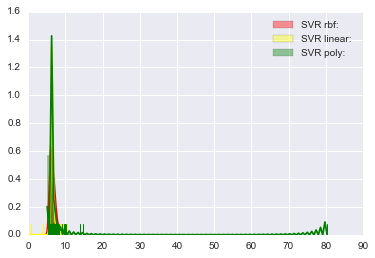

('transformed , svr rbf: ', 'Score on training data: ', 0.39851982238718131)
('transformed , svr rbf: ', 'Score on test data: ', 0.32250459244843899, '\n')
('transformed , svr linear: ', 'Score on training data: ', 0.20125006696629391)
('transformed , svr linear: ', 'Score on test data: ', 0.16735991181075494, '\n')
('transformed , svr poly: ', 'Score on training data: ', 0.059296229823359359)
('transformed , svr poly: ', 'Score on test data: ', -62.36567121142398, '\n')


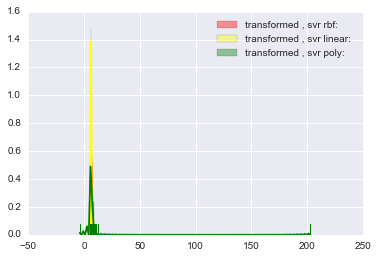

In [20]:
#Fit a regression model on numeric data
from sklearn.cross_validation import train_test_split
from sklearn.svm import LinearSVR
#On complete data without feature extraction
svr_model = SVR(kernel='rbf') #default
#below kernel is taking infinite time. Hence usign LinearSVR explicitly
#svr_linear_model = SVR(kernel="linear") #infinite time(hanging)
svr_linear_model = LinearSVR()
svr_poly_model = SVR(kernel="poly") #default degree is 3

#Split data beofrehand so that they can be compared on same data
training_x,test_x,training_Y,test_y = split_data(numerical_data,score_imdb)

# plt.plot(score_imdb,label="original data")
fit_model("SVR rbf: ",svr_model,training_x,test_x,training_Y,test_y,"red")
fit_model("SVR linear: ",svr_linear_model,training_x,test_x,training_Y,test_y,"yellow")
#ValueError: Input contains NaN, infinity or a value too large for dtype('float64'). 
#Without Standard Scaler poly kernel will throw above error.
fit_model("SVR poly: ",svr_poly_model,training_x,test_x,training_Y,test_y,"green")
sns.plt.show()

#Calling fit on any scikit-learn estimator will forget all the previously seen data
#So we can use same models for transformed data also
#same model on transformed data with data selection

training_x,test_x,training_Y,test_y = split_data(x_transformed,score_imdb)

fit_model("transformed , svr rbf: ",svr_model,training_x,test_x,training_Y,test_y,"red")
fit_model("transformed , svr linear: ",svr_linear_model,training_x,test_x,training_Y,test_y,"yellow")
fit_model("transformed , svr poly: ",svr_poly_model,training_x,test_x,training_Y,test_y,"green")
sns.plt.show()

('knn with k=5: ', 'Score on training data: ', 0.51535858460763295)
('knn with k=5: ', 'Score on test data: ', 0.1990708267274669, '\n')
('knn with k=10: ', 'Score on training data: ', 0.4389422001346226)
('knn with k=10: ', 'Score on test data: ', 0.26421633901416686, '\n')
('knn with k=20: ', 'Score on training data: ', 0.38988410318791622)
('knn with k=20: ', 'Score on test data: ', 0.29936603679027507, '\n')


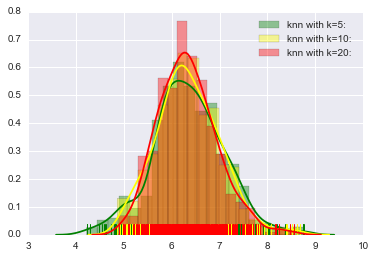

NameError: name 'default_knntraining_x' is not defined

In [21]:
#using knn regression
from sklearn.neighbors import KNeighborsRegressor

default_knn = KNeighborsRegressor(n_neighbors=5)
knn_10 = KNeighborsRegressor(n_neighbors=10)
knn_20 = KNeighborsRegressor(n_neighbors=20)

#Split data beofrehand so that they can be compared on same data
training_x,test_x,training_Y,test_y = split_data(numerical_data,score_imdb)

fit_model("knn with k=5: ",default_knn,training_x,test_x,training_Y,test_y,"green")
fit_model("knn with k=10: ",knn_10,training_x,test_x,training_Y,test_y,"yellow")
fit_model("knn with k=20: ",knn_20,training_x,test_x,training_Y,test_y,"red")
sns.plt.show()
#Calling fit on any scikit-learn estimator will forget all the previously seen data
#So we can use same models for transformed data also
#same model on transformed data with data selection

training_x,test_x,training_Y,test_y = split_data(x_transformed,score_imdb)

fit_model("transformed , knn with k=5: ",default_knntraining_x,test_x,training_Y,test_y,"yellow")
fit_model("transformed , knn with k=10: ",knn_10,training_x,test_x,training_Y,test_y,"red")
fit_model("transformed , knn with k=20: ",knn_20,training_x,test_x,training_Y,test_y,"green")
sns.plt.show()

('linear regression: ', 'Score on training data: ', 0.22279729718780594)
('linear regression: ', 'Score on test data: ', 0.2612072736847687, '\n')
('linear regression transformed: ', 'Score on training data: ', 0.21608683361258874)
('linear regression transformed: ', 'Score on test data: ', 0.17798207218285977, '\n')


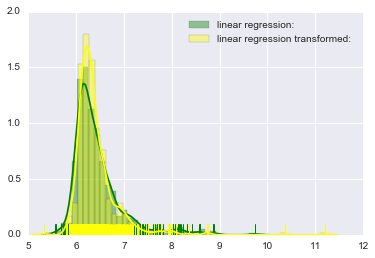

In [22]:
#Other regression models

from sklearn.linear_model import LinearRegression,Ridge

linear_reg = LinearRegression()

#Split data beofrehand so that they can be compared on same data
training_x,test_x,training_Y,test_y = split_data(numerical_data,score_imdb)
fit_model("linear regression: ",linear_reg,training_x,test_x,training_Y,test_y,"green")

#Calling fit on any scikit-learn estimator will forget all the previously seen data
#So we can use same models for transformed data also
training_x,test_x,training_Y,test_y = split_data(x_transformed,score_imdb)

fit_model("linear regression transformed: ",linear_reg,training_x,test_x,training_Y,test_y,"yellow")
sns.plt.show()

('Ridge alpha =1:', 'Score on training data: ', 0.22334501882677837)
('Ridge alpha =1:', 'Score on test data: ', 0.234169871129391, '\n')
('Ridge alpha =0.5 :', 'Score on training data: ', 0.2233450747344943)
('Ridge alpha =0.5 :', 'Score on test data: ', 0.23416363353090608, '\n')
('Ridge alpha =0.25:', 'Score on training data: ', 0.22334508873268866)
('Ridge alpha =0.25:', 'Score on test data: ', 0.23416049527593918, '\n')


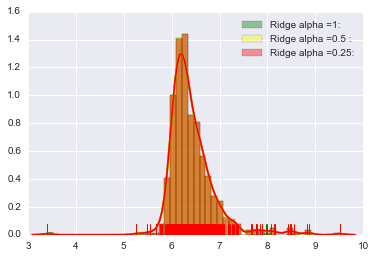

In [23]:
#Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of coefficients.
#alpha is the rete of penalty
ridge_1 = Ridge(alpha=1.0)
ridget_point_5 = Ridge(alpha=0.5)
ridget_point_25 = Ridge(alpha=0.25)

#Split data beofrehand so that they can be compared on same data
training_x,test_x,training_Y,test_y = split_data(numerical_data,score_imdb)

fit_model("Ridge alpha =1:",ridge_1,training_x,test_x,training_Y,test_y,"green")
fit_model("Ridge alpha =0.5 :",ridget_point_5,training_x,test_x,training_Y,test_y,"yellow")
fit_model("Ridge alpha =0.25:",ridget_point_25,training_x,test_x,training_Y,test_y,"red")
sns.plt.show()

('Ridge transformed alpha =1:', 'Score on training data: ', 0.21050411893079524)
('Ridge transformed alpha =1:', 'Score on test data: ', 0.22997197425525465, '\n')
('Ridge transformed alpha =0.5 :', 'Score on training data: ', 0.21050417097158702)
('Ridge transformed alpha =0.5 :', 'Score on test data: ', 0.22996577148140671, '\n')
('Ridge transformed alpha =0.25:', 'Score on training data: ', 0.21050418399769866)
('Ridge transformed alpha =0.25:', 'Score on test data: ', 0.22996265550449801, '\n')


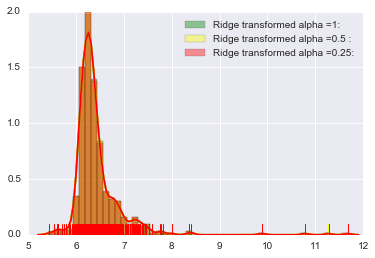

In [24]:
#Calling fit on any scikit-learn estimator will forget all the previously seen data
#So we can use same models for transformed data also
training_x,test_x,training_Y,test_y = split_data(x_transformed,score_imdb)
fit_model("Ridge transformed alpha =1:",ridge_1,training_x,test_x,training_Y,test_y,"green")
fit_model("Ridge transformed alpha =0.5 :",ridget_point_5,training_x,test_x,training_Y,test_y,"yellow")
fit_model("Ridge transformed alpha =0.25:",ridget_point_25,training_x,test_x,training_Y,test_y,"red")
sns.plt.show()
#By plotting the distribution against predicted values. You can see that values are in the middle range(5,7) and have a peak at 6.
#While the original distribution is more randomly distributed.
#Values of score returns the mean deviation from actual score.

In [25]:
#Let's check best models on trainging data
print ("best model on trainging score is :")
print ("training_score: ", best_on_training_data["training_score"])
print ("test_score:", best_on_training_data["test_score"])
print ("model: ", best_on_training_data["model"])


print ("\n\n\nbest model on test score is :")
print ("training_score: ", best_on_test_data["training_score"])
print ("test_score:", best_on_test_data["test_score"])
print ("model: ", best_on_test_data["model"])

best model on trainging score is :
('training_score: ', 0.51535858460763295)
('test_score:', 0.1990708267274669)
('model: ', 'knn with k=5: ')



best model on test score is :
('training_score: ', 0.38988410318791622)
('test_score:', 0.29936603679027507)
('model: ', 'knn with k=20: ')


('SVR rbf: ', 'Score on training data: ', 0.42198826359378494)
('SVR rbf: ', 'Score on test data: ', 0.36881179016599486, '\n')
('knn with k=5: ', 'Score on training data: ', 0.5099464943895029)
('knn with k=5: ', 'Score on test data: ', 0.21282294782186317, '\n')
('linear regression: ', 'Score on training data: ', 0.22608427458465452)
('linear regression: ', 'Score on test data: ', 0.23332417029147412, '\n')
('Ridge alpha =1:', 'Score on training data: ', 0.22608420404767024)
('Ridge alpha =1:', 'Score on test data: ', 0.23334259186737816, '\n')


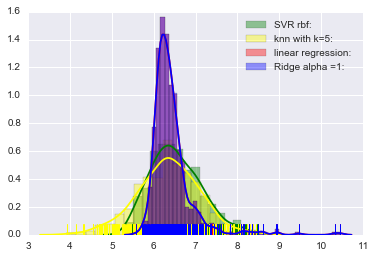

('transformed , svr rbf: ', 'Score on training data: ', 0.40016481966791334)
('transformed , svr rbf: ', 'Score on test data: ', 0.32634561601435597, '\n')
('transformed , knn with k=5: ', 'Score on training data: ', 0.54063262787689625)
('transformed , knn with k=5: ', 'Score on test data: ', 0.25318476362119369, '\n')
('linear regression transformed: ', 'Score on training data: ', 0.21732097143917772)
('linear regression transformed: ', 'Score on test data: ', 0.16484294409056999, '\n')
('Ridge transformed alpha =1:', 'Score on training data: ', 0.21732090830782147)
('Ridge transformed alpha =1:', 'Score on test data: ', 0.16480378338125434, '\n')


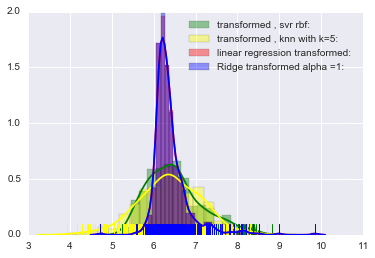

In [26]:
#Lets comprare the distribution of above types.

#Calling fit on any scikit-learn estimator will forget all the previously seen data
#So we can use same models for transformed data also

#Split data beofrehand so that they can be compared on same data
training_x,test_x,training_Y,test_y = split_data(numerical_data,score_imdb)

fit_model("SVR rbf: ",svr_model,training_x,test_x,training_Y,test_y,"green")
fit_model("knn with k=5: ",default_knn,training_x,test_x,training_Y,test_y,"yellow")
fit_model("linear regression: ",linear_reg,training_x,test_x,training_Y,test_y,"red")
fit_model("Ridge alpha =1:",ridge_1,training_x,test_x,training_Y,test_y,"blue")
sns.plt.show()

training_x,test_x,training_Y,test_y = split_data(x_transformed,score_imdb)

fit_model("transformed , svr rbf: ",svr_model,training_x,test_x,training_Y,test_y,"green")
fit_model("transformed , knn with k=5: ",default_knn,training_x,test_x,training_Y,test_y,"yellow")
fit_model("linear regression transformed: ",linear_reg,training_x,test_x,training_Y,test_y,"red")
fit_model("Ridge transformed alpha =1:",ridge_1,training_x,test_x,training_Y,test_y,"blue")
sns.plt.show()

('SVR rbf: ', 'Score on training data: ', 0.41993694096319301)
('SVR rbf: ', 'Score on test data: ', 0.35346803886587441, '\n')
('transformed , svr rbf: ', 'Score on training data: ', 0.39451732660762051)
('transformed , svr rbf: ', 'Score on test data: ', 0.37259520725857909, '\n')


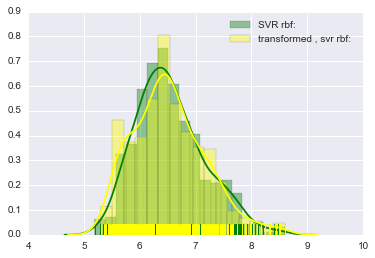

('knn with k=5: ', 'Score on training data: ', 0.50500197229506583)
('knn with k=5: ', 'Score on test data: ', 0.30260818079664042, '\n')
('transformed , knn with k=5: ', 'Score on training data: ', 0.5368670607764493)
('transformed , knn with k=5: ', 'Score on test data: ', 0.26771344243930117, '\n')


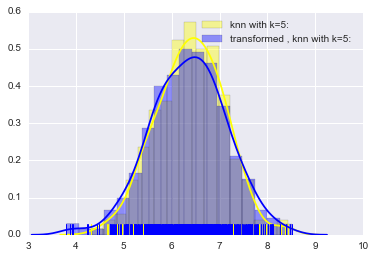

('linear regression: ', 'Score on training data: ', 0.22826998385466493)
('linear regression: ', 'Score on test data: ', 0.21119195017206627, '\n')
('linear regression transformed: ', 'Score on training data: ', 0.2124966730821195)
('linear regression transformed: ', 'Score on test data: ', 0.2123958726277253, '\n')


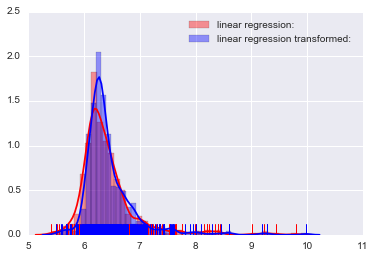

('Ridge alpha =1:', 'Score on training data: ', 0.22826991043321843)
('Ridge alpha =1:', 'Score on test data: ', 0.21120830501453025, '\n')
('Ridge transformed alpha =1:', 'Score on training data: ', 0.21249660473208068)
('Ridge transformed alpha =1:', 'Score on test data: ', 0.21239843263862901, '\n')


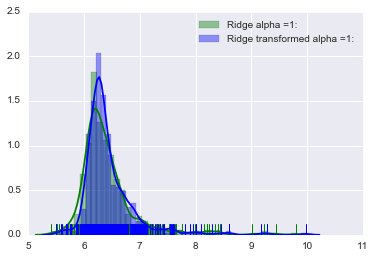

In [27]:
#Lets comprare the distribution same type on transformed and untransformed data

#Calling fit on any scikit-learn estimator will forget all the previously seen data
#So we can use same models for transformed data also

#Split data beofrehand so that they can be compared on same data
training_x,test_x,training_Y,test_y = split_data(numerical_data,score_imdb)
training_x_t,test_x_t,training_Y_t,test_y_t = split_data(x_transformed,score_imdb)

fit_model("SVR rbf: ",svr_model,training_x,test_x,training_Y,test_y,"green")
fit_model("transformed , svr rbf: ",svr_model,training_x_t,test_x_t,training_Y_t,test_y_t,"yellow")
sns.plt.show()
fit_model("knn with k=5: ",default_knn,training_x,test_x,training_Y,test_y,"yellow")
fit_model("transformed , knn with k=5: ",default_knn,training_x_t,test_x_t,training_Y_t,test_y_t,"blue")
sns.plt.show()
fit_model("linear regression: ",linear_reg,training_x,test_x,training_Y,test_y,"red")
fit_model("linear regression transformed: ",linear_reg,training_x_t,test_x_t,training_Y_t,test_y_t,"blue")
sns.plt.show()
fit_model("Ridge alpha =1:",ridge_1,training_x,test_x,training_Y,test_y,"green")
fit_model("Ridge transformed alpha =1:",ridge_1,training_x_t,test_x_t,training_Y_t,test_y_t,"blue")
sns.plt.show()